# Holiday Package Prediciton

### 1) Problem Statement

"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

### 2)Tasks to Solve :
To predict which customer is more likely to purchase the newly introduced travel package
* Which variables are most significant.
* Which segment of customers should be targeted more.

### 3) Data Collection

The dataset comes from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction?select=Travel.csv

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df=pd.read_csv('Datasets/Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### 3) Data Cleaning

#### Handling Missing Values

* 1. Handling Missing Values
* 2. Handling Duplicates
* 3. Check data type
* 4. Understand the dataset

In [4]:
# Check all the categories 
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [6]:
df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [7]:
df['MaritalStatus'].value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [8]:
df['Passport'].value_counts()

0    3466
1    1422
Name: Passport, dtype: int64

In [9]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [10]:
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [11]:
df['MaritalStatus'].value_counts()

Married      2340
Unmarried    1598
Divorced      950
Name: MaritalStatus, dtype: int64

In [12]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [13]:
# Check Missing Values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,'=', np.round(df[feature].isnull().mean()*100,5),'%')

Age = 4.62357 %
TypeofContact = 0.51146 %
DurationOfPitch = 5.13502 %
NumberOfFollowups = 0.92062 %
PreferredPropertyStar = 0.53191 %
NumberOfTrips = 2.86416 %
NumberOfChildrenVisiting = 1.35025 %
MonthlyIncome = 4.76678 %


In [14]:
# Statistics on numeric columns (NUll columns)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values( Imputation Techniques)
* Impute Median value for Age column
* Impute Mode for Type of Contract
* Impute Median for Duration of Pitch
* Impute Mode for NumberofFollowup as it is Discrete feature
* Impute Mode for PreferredPropertyStar
* Impute Median for NumberofTrips
* Impute Mode for NumberOfChildrenVisiting
* Impute Median for MonthlyIncome

In [15]:
# Age 
df.Age.fillna(df.Age.median(), inplace=True)

# Type of Contract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

# Duration Of Pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

# NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

# PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

# NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

# NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

# MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [16]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
# Drop Customer Id
df.drop('CustomerID', inplace=True, axis=1)

In [18]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [19]:
# Now we combine the NumberOfPersonVisiting and NumberOfChildrenVisiting as TotalVisiting because we don't need NumberOfPersonVisiting & NumberOfChildrenVisiting so we drop it

df['TotalVisiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [20]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [21]:
#  Get all the numeric Features
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print("No. of Numeric Features:",len(num_features))

No. of Numeric Features: 12


In [22]:
#  Get all the categorical Features
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("No. of Categorical Features:",len(cat_features))

No. of Categorical Features: 6


In [23]:
# Get all Discrete features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print("Num of Discrete Features :",len(discrete_features))

Num of Discrete Features : 9


In [24]:
#Get all continuous features
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


### Train Test Data

In [25]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
Y=df['ProdTaken']

In [26]:
Y.value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [27]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [28]:
## Separate Dataset into train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape

((3421, 17), (1467, 17))

In [29]:
# Create Column Transformer with 3 types of transformers

cat_features=X.select_dtypes(include="object").columns
num_features=X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer= StandardScaler()
cat_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',cat_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [30]:
preprocessor
X_test


,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
144,32.0,Company Invited,3,13.0,Small Business,Male,5.0,Deluxe,3.0,Married,1.0,0,2,0,Manager,19668.0,3.0
79,46.0,Self Enquiry,2,11.0,Small Business,Male,4.0,Deluxe,4.0,Married,1.0,1,5,0,Manager,20021.0,4.0
2098,37.0,Self Enquiry,3,22.0,Small Business,Male,4.0,Deluxe,3.0,Married,5.0,0,5,1,Manager,21334.0,3.0
4738,43.0,Self Enquiry,1,36.0,Small Business,Male,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,Manager,22950.0,5.0
2858,25.0,Self Enquiry,3,7.0,Large Business,Female,4.0,Basic,4.0,Unmarried,3.0,1,4,1,Executive,21880.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,59.0,Self Enquiry,1,30.0,Small Business,Female,4.0,Standard,3.0,Divorced,3.0,0,3,1,Senior Manager,28990.0,5.0
3901,41.0,Self Enquiry,1,9.0,Small Business,Female,4.0,Basic,3.0,Married,4.0,0,1,1,Executive,20679.0,6.0
3364,35.0,Company Invited,1,26.0,Small Business,Female,4.0,Deluxe,4.0,Married,6.0,0,3,1,Manager,23122.0,4.0
3639,50.0,Self Enquiry,1,7.0,Salaried,Male,4.0,Super Deluxe,3.0,Unmarried,6.0,0,3,1,AVP,34057.0,4.0


In [31]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [36]:
pd.DataFrame(X_train)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.714031,-0.649789,0.280718,-0.727208,-1.217370,-0.632714,1.409081,0.781435,0.460318,-0.067869
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.714031,-0.527737,-0.719632,1.768057,1.504605,-0.632714,1.409081,-1.279697,-1.005668,-0.777901
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.161582,1.281068,1.768057,-0.672975,1.580492,-0.046813,0.781435,-1.209722,-0.067869
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.470853,-0.771841,0.280718,0.520424,-0.128580,1.580492,-0.046813,0.781435,-0.017750,0.642163
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.527737,1.281068,0.520424,2.593396,-0.632714,0.681134,-1.279697,-0.423411,-0.067869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.649789,1.281068,-0.727208,-0.672975,-0.632714,-1.502707,0.781435,-0.531926,0.642163
3417,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.470853,-0.893893,-0.719632,1.768057,-1.217370,-0.632714,1.409081,0.781435,1.512744,-0.067869
3418,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.470853,1.547143,0.280718,-0.727208,2.049001,-0.632714,-0.774760,0.781435,-0.357400,0.642163
3419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.470853,1.791246,1.281068,-0.727208,-0.128580,-0.632714,-1.502707,0.781435,-0.250765,0.642163


###  Random Forest Classifier Model Training

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [58]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    # Train Model
    model.fit(X_train,Y_train)   
    
    # Make Predicitions
    Y_train_pred=model.predict(X_train)
    Y_test_pred=model.predict(X_test)
    
    #Training dataset Performance
    trainModel_Accuracy=accuracy_score(Y_train,Y_train_pred)
    trainModel_Precision=precision_score(Y_train,Y_train_pred)
    trainModel_Recall=recall_score(Y_train,Y_train_pred)
    trainModel_F1_Score=f1_score(Y_train,Y_train_pred,average='weighted')
    trainModel_ROC_AUC_Score=roc_auc_score(Y_train,Y_train_pred)
    
    #Test dataset Performance
    testModel_Accuracy=accuracy_score(Y_test,Y_test_pred)
    testModel_Precision=precision_score(Y_test,Y_test_pred)
    testModel_Recall=recall_score(Y_test,Y_test_pred)
    testModel_F1_Score=f1_score(Y_test,Y_test_pred,average='weighted')
    testModel_ROC_AUC_Score=roc_auc_score(Y_test,Y_test_pred)
    
    ## Print all Metrics
    print("*"*35)
    print("MODEL- ",list(models.keys())[i])
    
    print("*"*35)
    
    print('Training dataset Model Performance')
    print("- Accuracy: {:.4f}".format(trainModel_Accuracy))
    print('- Precision: {:.4f}'.format(trainModel_Precision))
    print('- Recall: {:.4f}'.format(trainModel_Recall))
    print('- F1 score: {:.4f}'.format(trainModel_F1_Score))
    print('- Roc Auc Score: {:.4f}'.format(trainModel_ROC_AUC_Score))
    
    print('-'*35)
    
    print('Test dataset Model Performance')
    print("- Accuracy: {:.4f}".format(testModel_Accuracy))
    print('- Precision: {:.4f}'.format(testModel_Precision))
    print('- Recall: {:.4f}'.format(testModel_Recall))
    print('- F1 score: {:.4f}'.format(testModel_F1_Score))
    print('- Roc Auc Score: {:.4f}'.format(testModel_ROC_AUC_Score))
    
    print('='*35)
    


***********************************
MODEL-  Logisitic Regression
***********************************
Training dataset Model Performance
- Accuracy: 0.8451
- Precision: 0.7101
- Recall: 0.3034
- F1 score: 0.8188
- Roc Auc Score: 0.6373
-----------------------------------
Test dataset Model Performance
- Accuracy: 0.8432
- Precision: 0.6719
- Recall: 0.3139
- F1 score: 0.8193
- Roc Auc Score: 0.6393
***********************************
MODEL-  Decision Tree
***********************************
Training dataset Model Performance
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 score: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------
Test dataset Model Performance
- Accuracy: 0.8984
- Precision: 0.7289
- Recall: 0.7263
- F1 score: 0.8984
- Roc Auc Score: 0.8321
***********************************
MODEL-  Random Forest
***********************************
Training dataset Model Performance
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 score: 1.0000
-

In [59]:
# Hyperparameter Tuning

randomForest_param={
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "auto", 8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}
adaboost_param={
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R']
}

In [60]:
randomcv_models=[
                    ("Random Forest",RandomForestClassifier(),randomForest_param),
                     ("Adaboost",AdaBoostClassifier(),adaboost_param),
                ]
randomcv_models

[('Random Forest',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('Adaboost',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']})]

In [61]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    
    random=RandomizedSearchCV(estimator=model,
                             param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1
                             )
    random.fit(X_train, Y_train)
    model_param[name]=random.best_params_
        
for model_name in model_param:
    print(f"------------------------Best Params for {model_name}------------------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
------------------------Best Params for Random Forest------------------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
------------------------Best Params for Adaboost------------------------------
{'n_estimators': 90, 'algorithm': 'SAMME'}


In [63]:
models={
    "Random Forest":RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=5,max_depth=None),
    "Adaboost":AdaBoostClassifier(n_estimators=90,algorithm='SAMME')
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    # Train Model
    model.fit(X_train,Y_train)   
    
    # Make Predicitions
    Y_train_pred=model.predict(X_train)
    Y_test_pred=model.predict(X_test)
    
    #Training dataset Performance
    trainModel_Accuracy=accuracy_score(Y_train,Y_train_pred)
    trainModel_Precision=precision_score(Y_train,Y_train_pred)
    trainModel_Recall=recall_score(Y_train,Y_train_pred)
    trainModel_F1_Score=f1_score(Y_train,Y_train_pred,average='weighted')
    trainModel_ROC_AUC_Score=roc_auc_score(Y_train,Y_train_pred)
    
    #Test dataset Performance
    testModel_Accuracy=accuracy_score(Y_test,Y_test_pred)
    testModel_Precision=precision_score(Y_test,Y_test_pred)
    testModel_Recall=recall_score(Y_test,Y_test_pred)
    testModel_F1_Score=f1_score(Y_test,Y_test_pred,average='weighted')
    testModel_ROC_AUC_Score=roc_auc_score(Y_test,Y_test_pred)
    
    ## Print all Metrics
    print("*"*35)
    print("MODEL- ",list(models.keys())[i])
    
    print("*"*35)
    
    print('Training dataset Model Performance')
    print("- Accuracy: {:.4f}".format(trainModel_Accuracy))
    print('- Precision: {:.4f}'.format(trainModel_Precision))
    print('- Recall: {:.4f}'.format(trainModel_Recall))
    print('- F1 score: {:.4f}'.format(trainModel_F1_Score))
    print('- Roc Auc Score: {:.4f}'.format(trainModel_ROC_AUC_Score))
    
    print('-'*35)
    
    print('Test dataset Model Performance')
    print("- Accuracy: {:.4f}".format(testModel_Accuracy))
    print('- Precision: {:.4f}'.format(testModel_Precision))
    print('- Recall: {:.4f}'.format(testModel_Recall))
    print('- F1 score: {:.4f}'.format(testModel_F1_Score))
    print('- Roc Auc Score: {:.4f}'.format(testModel_ROC_AUC_Score))
    
    print('='*35)
    

***********************************
MODEL-  Random Forest
***********************************
Training dataset Model Performance
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 score: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------
Test dataset Model Performance
- Accuracy: 0.9216
- Precision: 0.9392
- Recall: 0.6204
- F1 score: 0.9151
- Roc Auc Score: 0.8056
***********************************
MODEL-  Adaboost
***********************************
Training dataset Model Performance
- Accuracy: 0.8530
- Precision: 0.7761
- Recall: 0.3111
- F1 score: 0.8263
- Roc Auc Score: 0.6451
-----------------------------------
Test dataset Model Performance
- Accuracy: 0.8412
- Precision: 0.6847
- Recall: 0.2774
- F1 score: 0.8126
- Roc Auc Score: 0.6240


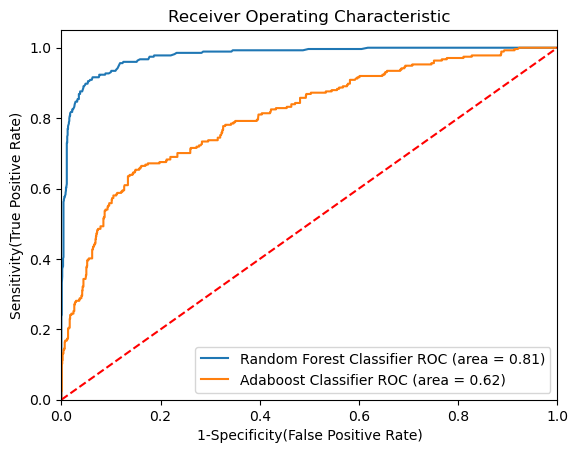

In [69]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=5,max_depth=None),
    'auc':  0.8056
},
  {
    'label': 'Adaboost Classifier',
    'model': AdaBoostClassifier(n_estimators=90,algorithm='SAMME'),
    'auc':  0.6240
},  
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, Y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

In [66]:
data=[[0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,-0.59284718,  1.47085313, -0.28363393,  1.28106819, -0.72720835,
       -1.21736985, -0.63271436, -0.7747603 , -1.27969734, -0.73033753,
       -0.777901 ]]

In [67]:
model.predict(data)

array([0], dtype=int64)